# 1. DATA COLLECTION AND STANDARDIZATION

## Data Collection

In [84]:
import pandas_datareader as pdr

In [85]:
df = pdr.get_data_tiingo('AAPL',api_key = 'bcd3d6ac6409c00917d2b1527c52b122924262c4')

<ipython-input-85-a67172d2fd3b>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL',api_key = 'bcd3d6ac6409c00917d2b1527c52b122924262c4')


In [86]:
print(df)
print(df.shape)
type(df)

                                   close     high     low     open     volume  \
symbol date                                                                     
AAPL   2018-09-10 00:00:00+00:00  218.33  221.850  216.47  220.950   39516453   
       2018-09-11 00:00:00+00:00  223.85  224.300  216.56  218.010   35749049   
       2018-09-12 00:00:00+00:00  221.07  225.000  219.84  224.940   49278740   
       2018-09-13 00:00:00+00:00  226.41  228.350  222.57  223.520   41706377   
       2018-09-14 00:00:00+00:00  223.84  226.840  222.52  225.750   31999289   
...                                  ...      ...     ...      ...        ...   
       2023-09-01 00:00:00+00:00  189.46  189.920  188.28  189.485   45766503   
       2023-09-05 00:00:00+00:00  189.70  189.980  187.61  188.280   45280027   
       2023-09-06 00:00:00+00:00  182.91  188.850  181.47  188.400   81755816   
       2023-09-07 00:00:00+00:00  177.56  178.210  173.54  175.180  112488803   
       2023-09-08 00:00:00+0

pandas.core.frame.DataFrame

## Store as CSV file

In [87]:
# saving the extracted data in a csv file
df.to_csv('AAPL.csv')

In [88]:
# import pandas library

import pandas as pd

In [89]:
stock_data = pd.read_csv('AAPL.csv')
stock_data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-09-10 00:00:00+00:00,218.33,221.85,216.47,220.95,39516453,52.271661,53.114405,51.826348,52.898931,158065812,0.0,1.0
1,AAPL,2018-09-11 00:00:00+00:00,223.85,224.30,216.56,218.01,35749049,53.593237,53.700974,51.847895,52.195048,142996196,0.0,1.0
2,AAPL,2018-09-12 00:00:00+00:00,221.07,225.00,219.84,224.94,49278740,52.927661,53.868565,52.633179,53.854200,197114960,0.0,1.0
3,AAPL,2018-09-13 00:00:00+00:00,226.41,228.35,222.57,223.52,41706377,54.206141,54.670608,53.286785,53.514230,166825508,0.0,1.0
4,AAPL,2018-09-14 00:00:00+00:00,223.84,226.84,222.52,225.75,31999289,53.590843,54.309090,53.274814,54.048127,127997156,0.0,1.0


In [90]:
# extract the wanted column and store in a new variable

stock_data_close = stock_data.reset_index()['close'] # this creates a pandas series
# but the indexing and iloc creates a pandas data frame

print(stock_data_close) # in 1d array
print(type(stock_data_close))
stock_data_close.shape

0       218.33
1       223.85
2       221.07
3       226.41
4       223.84
         ...  
1253    189.46
1254    189.70
1255    182.91
1256    177.56
1257    178.18
Name: close, Length: 1258, dtype: float64
<class 'pandas.core.series.Series'>


(1258,)

## Visualization the stock data 2 (i.e. close data)

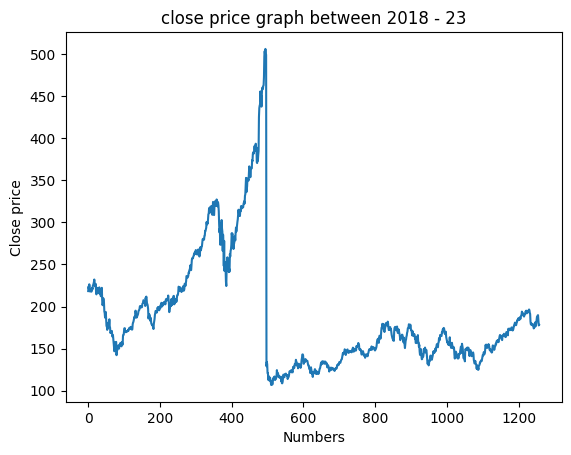

In [91]:
import matplotlib.pyplot as plt

plt.xlabel('Numbers')
plt.ylabel('Close price')
plt.title('close price graph between 2018 - 23')
plt.plot(stock_data_close)

LSTM is sensitive to scale of data. so we apply MinMax scale of normalisation

## Normalizing data

In [92]:
# import libraries

import numpy as  np

from sklearn.preprocessing import MinMaxScaler

In [93]:
# range of scale within 0,1
Ms = MinMaxScaler(feature_range=(0,1))

In [94]:
# fit to transform
# input should be in 2d array
#reshape(-1,1) means 1 column and row number is on the system ot set

# print(type(stock_data_close))
# stock_data_close = Ms.fit_transform(stock_data_close)

stock_data_close = Ms.fit_transform(np.asarray(stock_data_close).reshape(-1,1))

print(type(stock_data_close))
print(stock_data_close.shape)
stock_data_close
print(stock_data_close)

<class 'numpy.ndarray'>
(1258, 1)
[[0.27924859]
 [0.29307451]
 [0.28611146]
 ...
 [0.19053225]
 [0.17713212]
 [0.17868503]]


# 2. DATA SPLITTING

In this project, we are dealing with the time series dataset, means the data are with respect to time. Previous days stock closing price may affect next days stock price --> this is time series.

So while splitting, the partition shouldn't be in random order.
ex. 12,13,15,9,11,10,12
12,13,15,9,11 can be in training data and 10,12 in test data.

In [95]:
# splitting dataset to train and test split

#training_size = round(len(stock_data_close)*0.65)
training_size = int(len(stock_data_close)*0.65)
test_size = len(stock_data_close) - training_size

print(training_size,test_size)

817 441


In [96]:
# a = 17
# b = 3
# print(a/b)
# print(round(a/b))
# int(a/b)

In [97]:
# from start row to the training_size row number
# also training_data = stock_data_close[:training_size]
training_data = stock_data_close[0:training_size,:] # indexing the required part from row numbers

# from training_size to the last row, ie len(stock_data_close)
# also test_size = stock_data_close[training_size:]
test_data = stock_data_close[training_size:,:]

In [98]:
print(training_data)

[[2.79248591e-01]
 [2.93074515e-01]
 [2.86111459e-01]
 [2.99486537e-01]
 [2.93049468e-01]
 [2.78121478e-01]
 [2.79023168e-01]
 [2.79348779e-01]
 [2.83506575e-01]
 [2.77570445e-01]
 [2.85410144e-01]
 [2.88916719e-01]
 [2.84483406e-01]
 [2.95829681e-01]
 [2.97808391e-01]
 [3.01615529e-01]
 [3.06675016e-01]
 [3.13663118e-01]
 [3.03443957e-01]
 [2.94176581e-01]
 [2.92874139e-01]
 [3.00638698e-01]
 [2.74314339e-01]
 [2.69530369e-01]
 [2.88716343e-01]
 [2.76819036e-01]
 [2.88816531e-01]
 [2.86412023e-01]
 [2.73462743e-01]
 [2.81703193e-01]
 [2.85059487e-01]
 [2.90269255e-01]
 [2.71133375e-01]
 [2.82930495e-01]
 [2.74164058e-01]
 [2.63994991e-01]
 [2.66649969e-01]
 [2.80576080e-01]
 [2.88991860e-01]
 [2.52072636e-01]
 [2.37319975e-01]
 [2.42780213e-01]
 [2.58259236e-01]
 [2.54602379e-01]
 [2.44533500e-01]
 [2.18735128e-01]
 [2.13876018e-01]
 [2.00275517e-01]
 [2.11822167e-01]
 [2.17132123e-01]
 [1.97921102e-01]
 [1.75679399e-01]
 [1.75178460e-01]
 [1.63932373e-01]
 [1.69768316e-01]
 [1.688165

In [99]:
print(test_data)

[[0.16115216]
 [0.17092048]
 [0.16961803]
 [0.181866  ]
 [0.17257358]
 [0.16904195]
 [0.18149029]
 [0.16385723]
 [0.16105197]
 [0.15757044]
 [0.16568566]
 [0.17232311]
 [0.17392611]
 [0.18407013]
 [0.18146525]
 [0.18169067]
 [0.17873513]
 [0.17715717]
 [0.18827802]
 [0.18249217]
 [0.17051972]
 [0.16320601]
 [0.16363181]
 [0.1636819 ]
 [0.17092048]
 [0.17204759]
 [0.1636819 ]
 [0.16588604]
 [0.15769568]
 [0.14875391]
 [0.14444584]
 [0.13918597]
 [0.13720726]
 [0.13259862]
 [0.1323732 ]
 [0.13119599]
 [0.15902317]
 [0.17016907]
 [0.16974327]
 [0.17282405]
 [0.16546024]
 [0.16418284]
 [0.16235441]
 [0.1702943 ]
 [0.17392611]
 [0.16350657]
 [0.15479023]
 [0.15539136]
 [0.16518472]
 [0.16458359]
 [0.15539136]
 [0.15143394]
 [0.14396994]
 [0.13332498]
 [0.14001252]
 [0.14529743]
 [0.1459737 ]
 [0.14116468]
 [0.14958046]
 [0.14875391]
 [0.14108954]
 [0.13139637]
 [0.12673763]
 [0.14053851]
 [0.12944271]
 [0.11994991]
 [0.1096556 ]
 [0.1208516 ]
 [0.13212273]
 [0.13470257]
 [0.14311835]
 [0.14

1. In the case of time series , we need to do a preprocessing ,in which the previous datas are used to predict the next one.



1.   time stamp number = 3


2. ex.
3. train data 120,130,125,140,134,150
4.  x_train          y_test
5. f1   f2   f3       o/p
6. 120 130  125       140
7. 130 125  140       134
8. 125 140  134       150


9. test data 160,190,154,160,170

10.  x_test           y_test
11. f1   f2   f3       o/p
12. 160 190  154       160
13. 190 154  160       170

In [100]:
# based on above explaination, convert the aray of values to data set matrix

def create_dataset(dataset,time_step = 1):    # time_step = 1 is default
  dataX, dataY = [],[]

  for i in range(len(dataset) - time_step - 1):
    a = dataset[i:(i+time_step),0]   # for timestep 2, i=0 to 0+2 ie. 0,1
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])  # 0+2 = 2 means 3rd element of the dataset

  return np.asarray(dataX), np.asarray(dataY)

In [101]:
# reshape X = t,t+1,t+2,t+3  Y = t+4  for time step 3
time_step = 100
X_train,Y_train = create_dataset(training_data,time_step)
X_test,Y_test = create_dataset(test_data,time_step)


In [102]:
X_train
Y_train
print(X_train.shape,Y_train.shape)


(716, 100) (716,)


In [103]:
print(X_test.shape, Y_test.shape)

(340, 100) (340,)


# LSTM MODEL

In [104]:
# reshape input to be [samples, time_step, features] which is required for lstm - a 3d array
# reshaping the train and test input as required

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [105]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


In [106]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')


In [107]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [108]:
model.fit(X_train,Y_train,validation_data = (X_test, Y_test), epochs = 100, batch_size= 64, verbose = 1)

Epoch 1/100
12/12 [==============================] - 7s 207ms/step - loss: 0.0319 - val_loss: 6.8635e-04
Epoch 2/100
12/12 [==============================] - 2s 164ms/step - loss: 0.0122 - val_loss: 4.8921e-04
Epoch 3/100
12/12 [==============================] - 2s 155ms/step - loss: 0.0097 - val_loss: 3.9122e-04
Epoch 4/100
12/12 [==============================] - 1s 123ms/step - loss: 0.0090 - val_loss: 3.3936e-04
Epoch 5/100
12/12 [==============================] - 1s 122ms/step - loss: 0.0083 - val_loss: 9.1725e-04
Epoch 6/100
12/12 [==============================] - 1s 122ms/step - loss: 0.0071 - val_loss: 3.2065e-04
Epoch 7/100
12/12 [==============================] - 1s 123ms/step - loss: 0.0066 - val_loss: 7.4096e-04
Epoch 8/100
12/12 [==============================] - 1s 124ms/step - loss: 0.0057 - val_loss: 3.5431e-04
Epoch 9/100
12/12 [==============================] - 1s 122ms/step - loss: 0.0067 - val_loss: 3.3998e-04
Epoch 10/100
12/12 [==============================] - 2

# Predict The Test Data and Print Output

In [109]:
# prediction of output(Y_) for normalized input data(X_)
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

11/11 [==============================] - 0s 26ms/step


In [110]:
train_predict
print(train_predict.shape)
print(test_predict.shape)

(716, 1)
(340, 1)


In [111]:
# Transformback to original
# Inverse of MinMaxScaler standardization to original data

train_predict = Ms.inverse_transform(train_predict)
test_predict = Ms.inverse_transform(test_predict)

In [112]:
train_predict
test_predict

print(train_predict.shape)
print(test_predict.shape)

(716, 1)
(340, 1)


In [113]:
len(train_predict)

716

In [114]:
# calculate Root Mean Squared Error (RMSE) performance
import math
from sklearn.metrics import mean_squared_error


In [115]:
# calculate RMS error for training data
# Y_train --> actual out put data, train_predict --> out put data by the model

math.sqrt(mean_squared_error(Y_train, train_predict))

222.76511760197604

In [116]:
# calculate RMS for test data

math.sqrt(mean_squared_error(Y_test, test_predict))

160.09690199759504

In [117]:
## Plotting

# shift train prediction for plotting
look_back = 100
# create an array train_predict_plot, empty but same sized as stock_data_close,
train_predict_plot = np.empty_like(stock_data_close)
train_predict_plot[:, :] = np.nan   # filled with nan values initially

# value assigned from the train_predict in given dimensions will reaplace nan value
train_predict_plot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test prediction for plotting
# create an array test_predict_plot, empty but same sized as stock_data_close,
test_predict_plot = np.empty_like(stock_data_close)
test_predict_plot[:, :] = np.nan   # filled with nan values initially

test_predict_plot[len(train_predict) + look_back*2 : len(stock_data_close) - 2, :] = test_predict

In [118]:
len(stock_data_close)

1258

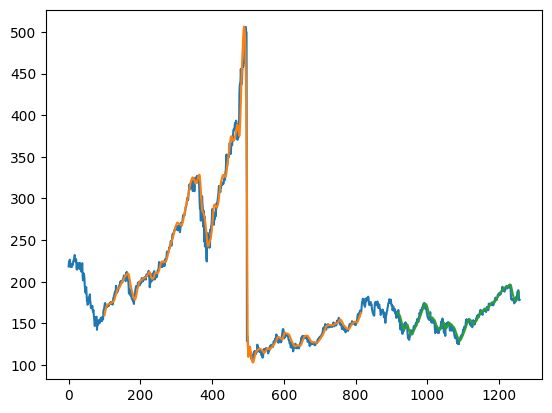

In [119]:
# plot base line and prediction
plt.plot(Ms.inverse_transform (stock_data_close))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()

# PREDICTION AND PLOTTING FUTURE DATA

In [120]:
len(test_data)

441

In [121]:
# we take 100 data from the test_data to predict the future

x_input = test_data[341:].reshape(1,-1)
print(x_input.shape)

(1, 100)


In [122]:
print(x_input)
type(x_input) # array

[[0.14935504 0.15226049 0.14980589 0.14572323 0.14649969 0.14259236
  0.14256731 0.15421415 0.15739512 0.15716969 0.15453976 0.15180964
  0.14765185 0.16713838 0.16696306 0.16262993 0.16710081 0.16758923
  0.16463369 0.16338134 0.16338134 0.16493425 0.17084534 0.17112085
  0.16871634 0.16210394 0.16280526 0.16568566 0.17179712 0.1764809
  0.17635567 0.183469   0.18562304 0.18219161 0.18126487 0.17778334
  0.18467126 0.18564809 0.19273638 0.19153413 0.19313713 0.19829681
  0.19556669 0.19579211 0.19316218 0.20077646 0.19997495 0.19644333
  0.20343143 0.20641202 0.20726362 0.21823419 0.2144521  0.21162179
  0.21282405 0.20999374 0.20480902 0.20348153 0.20771446 0.20964308
  0.21001879 0.21828428 0.21763306 0.2210645  0.21613024 0.21314966
  0.21517846 0.21735755 0.21956168 0.21635567 0.22289292 0.22444584
  0.22232937 0.21475266 0.21122104 0.18822793 0.18036318 0.18274264
  0.17871008 0.17815905 0.1777082  0.18189105 0.17685661 0.17465247
  0.1682154  0.16944271 0.17282405 0.17630557 0.1

numpy.ndarray

In [123]:
temp_input = list(x_input)
print(type(temp_input))

<class 'list'>


In [124]:
temp_input = temp_input[0].tolist() # convert the temp_input[0] to a list

In [125]:
len(temp_input)
print(type(temp_input))

<class 'list'>


### use the model to predict

In [128]:
# predicting output for next 30 days
lst_output = []
n_steps = 100
i = 0

while(i<30):
  if(len(temp_input)>100):
    x_input = np.array(temp_input[1:]) # all model or operation is on array
    print(f'{i} day input {x_input}')
    x_input = x_input.reshape(1,-1)

    x_input = x_input.reshape(1,n_steps,1)
    yhat = model.predict(x_input,verbose = 0)

    print(f'{i} day output {yhat}')
    temp_input.extend(yhat[0].tolist()) # temp length 102
    temp_input = temp_input[1:] # temp length 101, from which, 100 used in x_input in next round

    lst_output.extend(yhat.tolist())
    i = i+1



  else:
    x_input = x_input.reshape(1,n_steps,1)  # in 3d array to use as input in lstm model
    yhat = model.predict(x_input, verbose = 0) # model feed

    temp_input.extend(yhat[0].tolist()) # add the newly got output with temp_input in list form
    len(temp_input) # incremented by 1

    lst_output.extend(yhat.tolist()) # but all storage or manupulations is on list
    i = i+1

print(lst_output)

0 day input [0.21001879 0.21828428 0.21763306 0.2210645  0.21613024 0.21314966
 0.21517846 0.21735755 0.21956168 0.21635567 0.22289292 0.22444584
 0.22232937 0.21475266 0.21122104 0.18822793 0.18036318 0.18274264
 0.17871008 0.17815905 0.1777082  0.18189105 0.17685661 0.17465247
 0.1682154  0.16944271 0.17282405 0.17630557 0.18604884 0.17417658
 0.17976205 0.18371947 0.19356293 0.20240451 0.20295554 0.20693801
 0.20753914 0.19053225 0.17713212 0.17868503 0.20058069 0.20005961
 0.20004323 0.20045112 0.201121   0.20192328 0.20277964 0.20365259
 0.20452897 0.20540817 0.20629427 0.20719239 0.20810668 0.20904008
 0.20999381 0.21096845 0.21196343 0.21297769 0.21400987 0.21505861
 0.21612246 0.21719991 0.21828978 0.21939093 0.22050253 0.22162385
 0.22275427 0.22389345 0.22504109 0.22619709 0.22736144 0.22853409
 0.22971521 0.23090498 0.2321035  0.2333111  0.23452795 0.23575436
 0.23699062 0.23823705 0.23949386 0.24076134 0.24203984 0.24332966
 0.24463098 0.24594413 0.24726942 0.24860708 0.249

In [130]:
len(lst_output)

30

In [132]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [136]:
len(stock_data_close)

1258

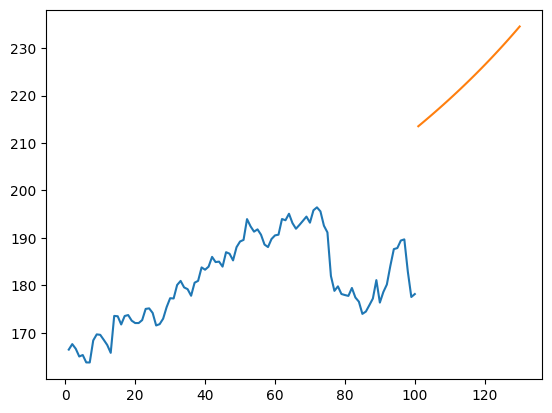

In [139]:
plt.plot(day_new,Ms.inverse_transform(stock_data_close[1158:]))
plt.plot(day_pred,Ms.inverse_transform(lst_output))

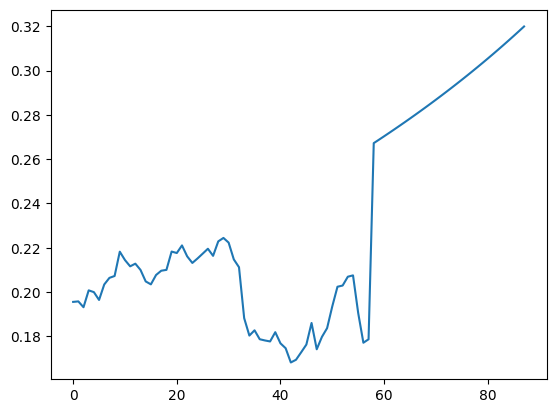

In [137]:
df3=stock_data_close.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [141]:
df3=Ms.inverse_transform(df3).tolist()

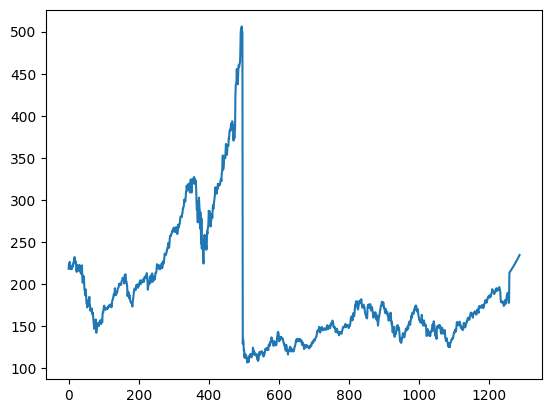

In [142]:
plt.plot(df3)